In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import functions from the src folder
import sys
import os
import pandas as pd
import numpy as np

# Add the parent directory of `src` to the Python path
sys.path.append(os.path.abspath("../"))

### Data Understang and cleaning

In [3]:
from src.data_processing import load_data, clean_data, handle_missing_values, detect_outliers, numeric_summary, save_cleaned_data
from src.data_visualization import plot_missing_values, plot_numeric_distributions, plot_categorical_distributions, plot_correlation_heatmap, plot_outliers

In [4]:
# Load and clean data 
raw_data_path = "../data/raw/Mirame_AI_Engineer_Technical_Assessment_Dataset.xlsx"
data = load_data(raw_data_path)
cleaned_data = clean_data(data)

In [5]:
data

,customer_id,age,gender,savings_balance,monthly_contribution,payment_history_score,loan_history,business_type,mobile_money_volume,utility_payments,years_in_sacco,location,group_membership,dependents
0,RW001,35.0,M,450000.0,NaN,8.5,2.0,retail,250000.0,YES,3,Kigali,YES,3.0
1,RW002,42.0,F,NaN,120000.0,9.0,0.0,agriculture,180000.0,YES,1,Musanze,NO,2.0
2,RW003,28.0,F,250000.0,80000.0,NaN,1.0,services,NaN,NaN,2,Kigali,YES,NaN
3,RW004,55.0,M,1200000.0,200000.0,7.5,4.0,agriculture,450000.0,NO,8,Huye,YES,5.0
4,RW005,NaN,F,180000.0,60000.0,8.0,0.0,retail,120000.0,YES,1,NaN,NO,2.0
5,RW006,39.0,M,850000.0,150000.0,9.5,3.0,NaN,380000.0,YES,4,Kigali,YES,4.0
6,RW007,31.0,F,320000.0,NaN,6.5,1.0,services,90000.0,NO,2,Musanze,YES,1.0
7,RW008,46.0,M,NaN,NaN,8.0,2.0,agriculture,280000.0,YES,5,Huye,NO,6.0
8,RW009,33.0,F,420000.0,100000.0,7.0,NaN,retail,150000.0,YES,3,Kigali,NaN,3.0
9,RW010,50.0,M,980000.0,180000.0,9.0,5.0,services,420000.0,NaN,6,Musanze,YES,4.0


In [6]:
cleaned_data

,customer_id,age,gender,savings_balance,monthly_contribution,payment_history_score,loan_history,business_type,mobile_money_volume,utility_payments,years_in_sacco,location,group_membership,dependents
0,RW001,35.0,M,450000.0,NaN,8.5,2.0,retail,250000.0,YES,3,Kigali,YES,3.0
1,RW002,42.0,F,NaN,120000.0,9.0,0.0,agriculture,180000.0,YES,1,Musanze,NO,2.0
2,RW003,28.0,F,250000.0,80000.0,NaN,1.0,services,NaN,NaN,2,Kigali,YES,NaN
3,RW004,55.0,M,1200000.0,200000.0,7.5,4.0,agriculture,450000.0,NO,8,Huye,YES,5.0
4,RW005,NaN,F,180000.0,60000.0,8.0,0.0,retail,120000.0,YES,1,NaN,NO,2.0
5,RW006,39.0,M,850000.0,150000.0,9.5,3.0,NaN,380000.0,YES,4,Kigali,YES,4.0
6,RW007,31.0,F,320000.0,NaN,6.5,1.0,services,90000.0,NO,2,Musanze,YES,1.0
7,RW008,46.0,M,NaN,NaN,8.0,2.0,agriculture,280000.0,YES,5,Huye,NO,6.0
8,RW009,33.0,F,420000.0,100000.0,7.0,NaN,retail,150000.0,YES,3,Kigali,NaN,3.0
9,RW010,50.0,M,980000.0,180000.0,9.0,5.0,services,420000.0,NaN,6,Musanze,YES,4.0


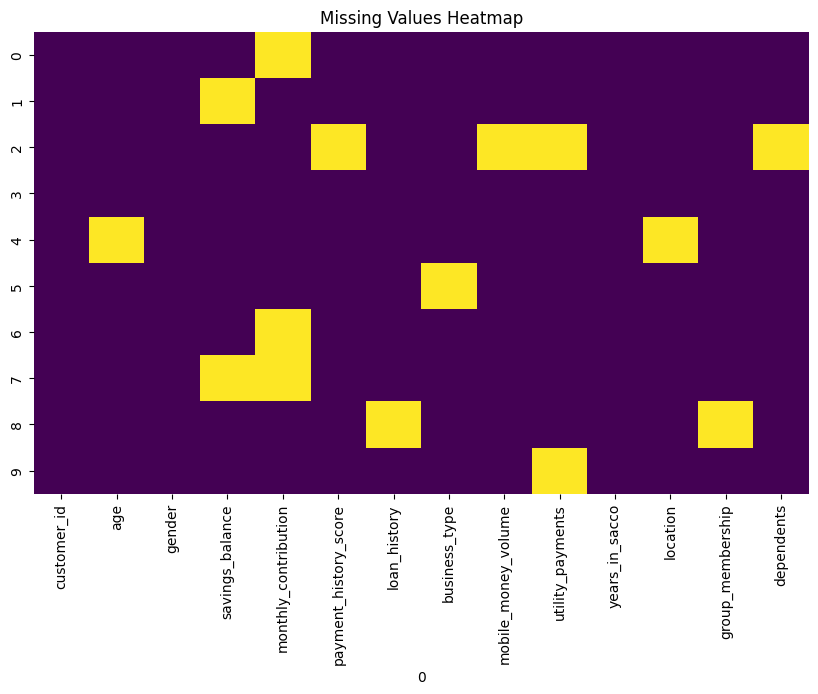

In [7]:
# Explore missing values
plot_missing_values(cleaned_data)

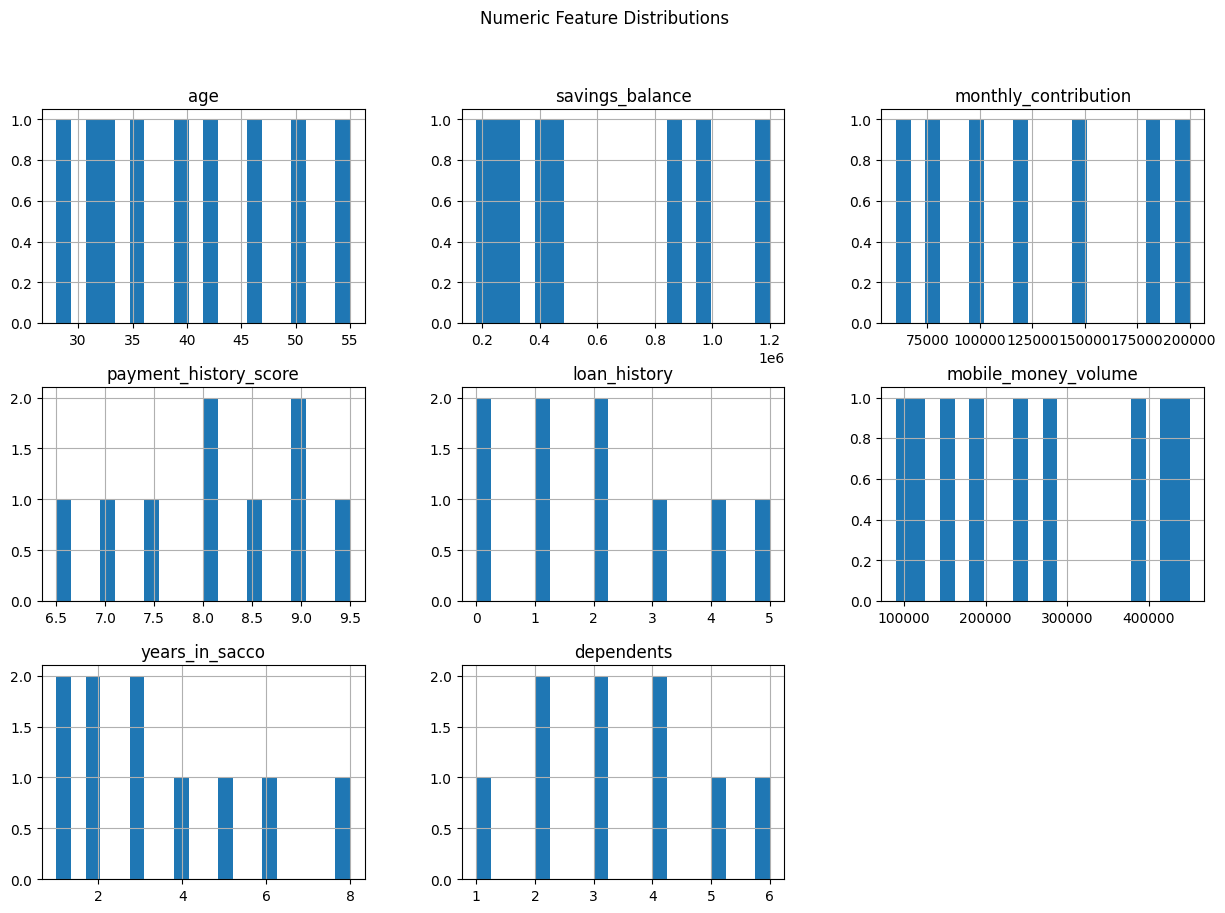

In [8]:
# Numeric feature distributions
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
plot_numeric_distributions(cleaned_data, numeric_columns)

In [9]:
# Percentage of missing values per column
missing_percentage = cleaned_data.isnull().mean() * 100
print("Missing Values (%):\n", missing_percentage)

Missing Values (%):
 0
customer_id               0.0
age                      10.0
gender                    0.0
savings_balance          20.0
monthly_contribution     30.0
payment_history_score    10.0
loan_history             10.0
business_type            10.0
mobile_money_volume      10.0
utility_payments         20.0
years_in_sacco            0.0
location                 10.0
group_membership         10.0
dependents               10.0
dtype: float64


In [10]:
cleaned_data = handle_missing_values(cleaned_data)

Remaining Missing Values:
 0
customer_id              0
age                      0
gender                   0
savings_balance          0
monthly_contribution     0
payment_history_score    0
loan_history             0
business_type            0
mobile_money_volume      0
utility_payments         0
years_in_sacco           0
location                 0
group_membership         0
dependents               0
dtype: int64


In [11]:

numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
outliers_info = detect_outliers(cleaned_data, numeric_columns)
print("Outliers Information:\n", outliers_info)

numeric_summary_stats = numeric_summary(cleaned_data, numeric_columns)
print("Numeric Summary Statistics:\n", numeric_summary_stats)

Outliers Information:
                        Lower Bound Outliers  Upper Bound Outliers
age                                       0                     0
savings_balance                           0                     0
monthly_contribution                      0                     1
payment_history_score                     0                     0
loan_history                              0                     0
mobile_money_volume                       0                     0
years_in_sacco                            0                     0
dependents                                0                     0
Numeric Summary Statistics:
 0            age  savings_balance  monthly_contribution  \
count  10.000000     1.000000e+01              10.00000   
mean   39.800000     5.520000e+05          125000.00000   
std     8.599742     3.383801e+05           42491.82928   
min    28.000000     1.800000e+05           60000.00000   
25%    33.500000     3.450000e+05          105000.00000   


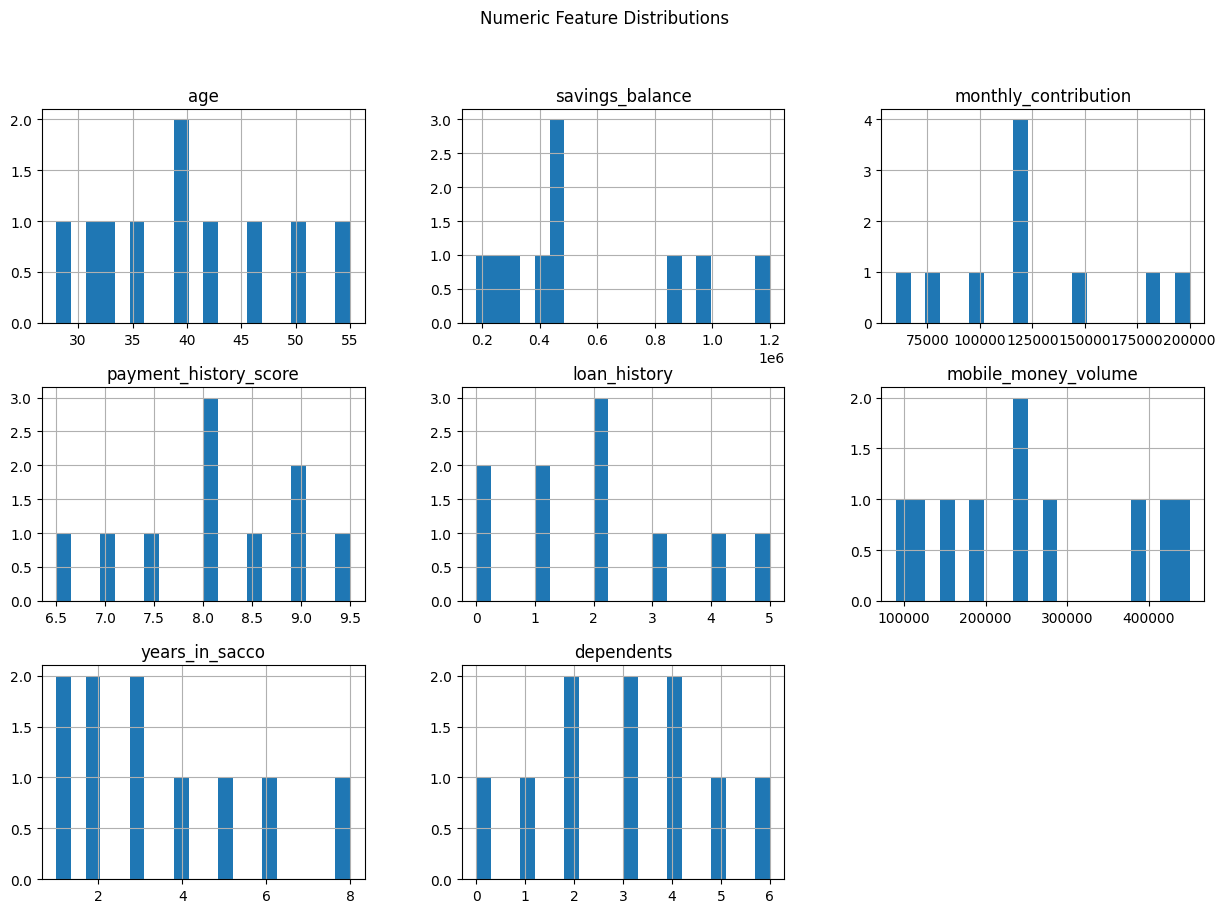

In [12]:
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
plot_numeric_distributions(cleaned_data, numeric_columns)


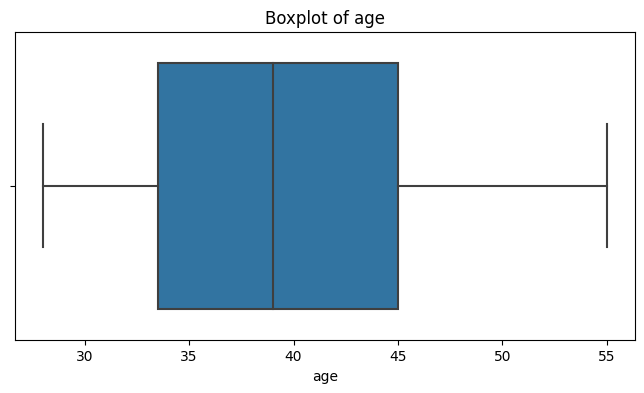

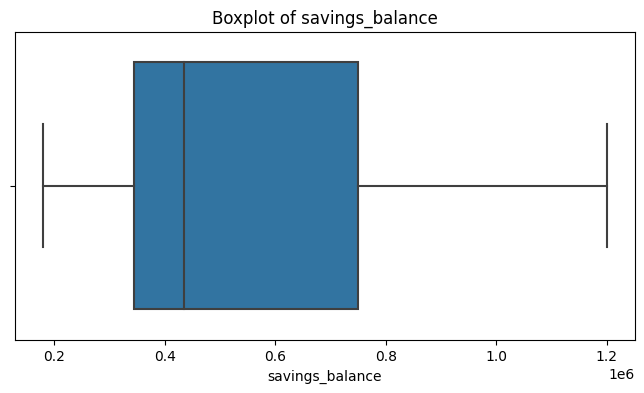

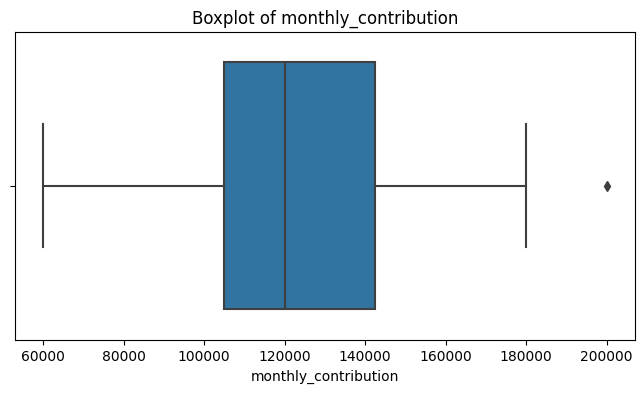

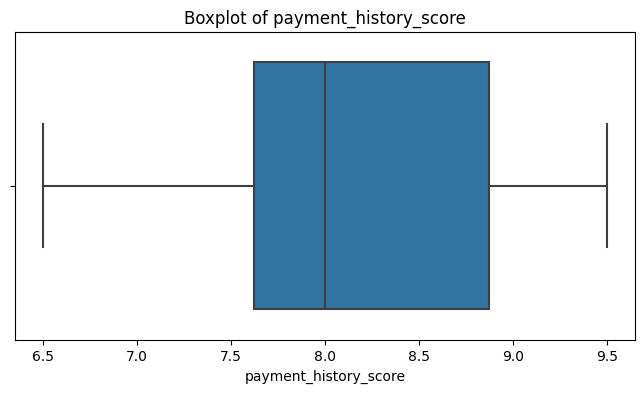

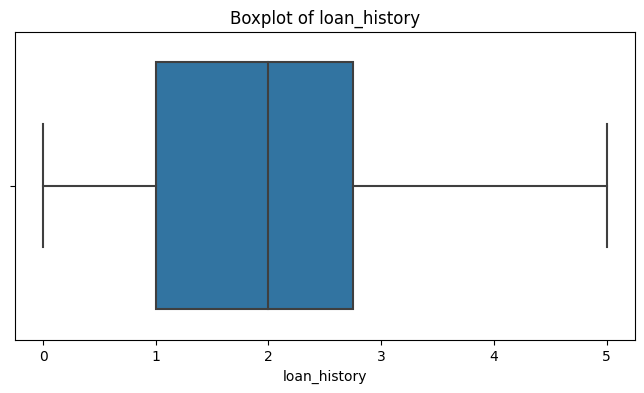

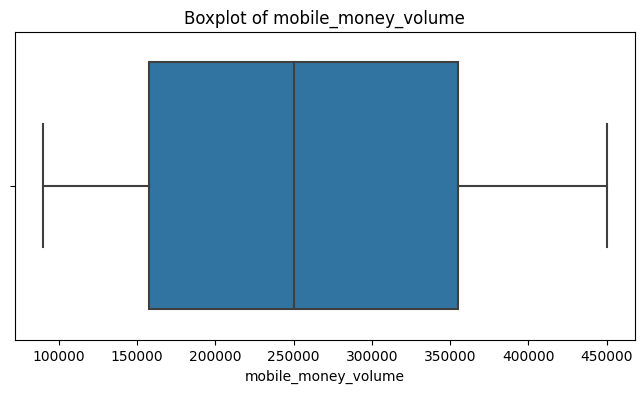

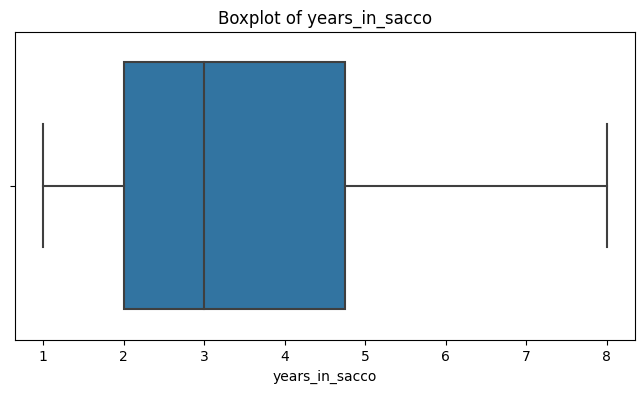

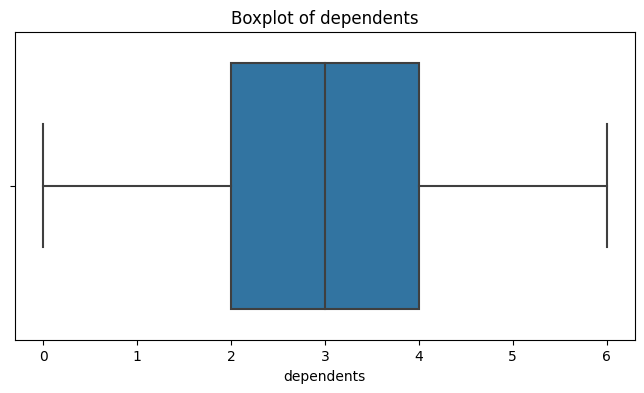

In [13]:
plot_outliers(cleaned_data, numeric_columns)


#### Scale Columns with Wide Ranges
For columns with wide ranges (e.g., savings_balance, mobile_money_volume, monthly_contribution), scaling ensures that no single feature disproportionately influences the model.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['savings_balance', 'mobile_money_volume', 'monthly_contribution']
cleaned_data[columns_to_scale] = scaler.fit_transform(cleaned_data[columns_to_scale])

In [15]:
cleaned_data

,customer_id,age,gender,savings_balance,monthly_contribution,payment_history_score,loan_history,business_type,mobile_money_volume,utility_payments,years_in_sacco,location,group_membership,dependents
0,RW001,35.0,M,0.264706,0.428571,8.5,2.0,retail,0.444444,YES,3,Kigali,YES,3.0
1,RW002,42.0,F,0.250000,0.428571,9.0,0.0,agriculture,0.250000,YES,1,Musanze,NO,2.0
2,RW003,28.0,F,0.068627,0.142857,8.0,1.0,services,0.444444,Unknown,2,Kigali,YES,0.0
3,RW004,55.0,M,1.000000,1.000000,7.5,4.0,agriculture,1.000000,NO,8,Huye,YES,5.0
4,RW005,39.0,F,0.000000,0.000000,8.0,0.0,retail,0.083333,YES,1,Unknown,NO,2.0
5,RW006,39.0,M,0.656863,0.642857,9.5,3.0,Unknown,0.805556,YES,4,Kigali,YES,4.0
6,RW007,31.0,F,0.137255,0.428571,6.5,1.0,services,0.000000,NO,2,Musanze,YES,1.0
7,RW008,46.0,M,0.250000,0.428571,8.0,2.0,agriculture,0.527778,YES,5,Huye,NO,6.0
8,RW009,33.0,F,0.235294,0.285714,7.0,2.0,retail,0.166667,YES,3,Kigali,Unknown,3.0
9,RW010,50.0,M,0.784314,0.857143,9.0,5.0,services,0.916667,Unknown,6,Musanze,YES,4.0


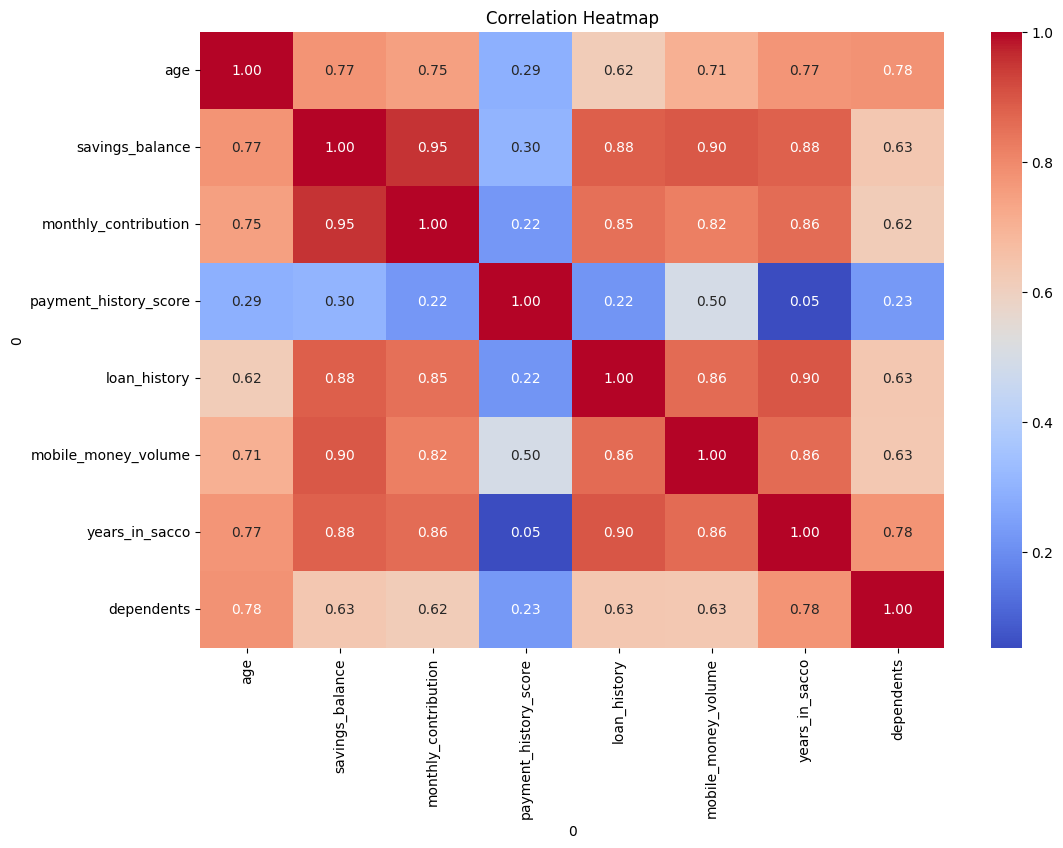

In [16]:
plot_correlation_heatmap(cleaned_data, numeric_columns)

#### Handle High Correlation
From the correlation heatmap, the following pairs of features are highly correlated:

savings_balance and monthly_contribution (0.95)
savings_balance and mobile_money_volume (0.90)
loan_history and savings_balance (0.88)
Including all these features may lead to multicollinearity, reducing model interpretability.

Action
create new combined features to replace redundant ones
Savings-to-Contribution Ratio: Evaluates saving habits compared to monthly contributions.


In [17]:
cleaned_data['savings_to_contribution_ratio'] = cleaned_data['savings_balance'] / (cleaned_data['monthly_contribution']+ 1)
cleaned_data['loan_to_savings_ratio'] = cleaned_data['loan_history'] / (cleaned_data['savings_balance'] + 1)
cleaned_data['log_savings_balance'] = np.log1p(cleaned_data['savings_balance'])

In [18]:
cleaned_data

,customer_id,age,gender,savings_balance,monthly_contribution,payment_history_score,loan_history,business_type,mobile_money_volume,utility_payments,years_in_sacco,location,group_membership,dependents,savings_to_contribution_ratio,loan_to_savings_ratio,log_savings_balance
0,RW001,35.0,M,0.264706,0.428571,8.5,2.0,retail,0.444444,YES,3,Kigali,YES,3.0,0.185294,1.581395,0.234840
1,RW002,42.0,F,0.250000,0.428571,9.0,0.0,agriculture,0.250000,YES,1,Musanze,NO,2.0,0.175000,0.000000,0.223144
2,RW003,28.0,F,0.068627,0.142857,8.0,1.0,services,0.444444,Unknown,2,Kigali,YES,0.0,0.060049,0.935780,0.066375
3,RW004,55.0,M,1.000000,1.000000,7.5,4.0,agriculture,1.000000,NO,8,Huye,YES,5.0,0.500000,2.000000,0.693147
4,RW005,39.0,F,0.000000,0.000000,8.0,0.0,retail,0.083333,YES,1,Unknown,NO,2.0,0.000000,0.000000,0.000000
5,RW006,39.0,M,0.656863,0.642857,9.5,3.0,Unknown,0.805556,YES,4,Kigali,YES,4.0,0.399829,1.810651,0.504926
6,RW007,31.0,F,0.137255,0.428571,6.5,1.0,services,0.000000,NO,2,Musanze,YES,1.0,0.096078,0.879310,0.128617
7,RW008,46.0,M,0.250000,0.428571,8.0,2.0,agriculture,0.527778,YES,5,Huye,NO,6.0,0.175000,1.600000,0.223144
8,RW009,33.0,F,0.235294,0.285714,7.0,2.0,retail,0.166667,YES,3,Kigali,Unknown,3.0,0.183007,1.619048,0.211309
9,RW010,50.0,M,0.784314,0.857143,9.0,5.0,services,0.916667,Unknown,6,Musanze,YES,4.0,0.422323,2.802198,0.579034


In [19]:
cleaned_data.drop(columns=['savings_balance', 'mobile_money_volume'], inplace=True)

##### loan_history_to_monthly_contribution_ratio
loan_history:
This could represent the total loans taken by the individual.

monthly_contribution:
This represents the individual's regular income or contributions to the SACCO.

In [20]:
cleaned_data['debt_to_income_ratio'] = cleaned_data['loan_history'] / (cleaned_data['monthly_contribution'] + 1)
cleaned_data['dependents_to_contribution'] = cleaned_data['dependents'] / (cleaned_data['monthly_contribution'] + 1)

In [21]:

cleaned_data 

,customer_id,age,gender,monthly_contribution,payment_history_score,loan_history,business_type,utility_payments,years_in_sacco,location,group_membership,dependents,savings_to_contribution_ratio,loan_to_savings_ratio,log_savings_balance,debt_to_income_ratio,dependents_to_contribution
0,RW001,35.0,M,0.428571,8.5,2.0,retail,YES,3,Kigali,YES,3.0,0.185294,1.581395,0.234840,1.400000,2.100000
1,RW002,42.0,F,0.428571,9.0,0.0,agriculture,YES,1,Musanze,NO,2.0,0.175000,0.000000,0.223144,0.000000,1.400000
2,RW003,28.0,F,0.142857,8.0,1.0,services,Unknown,2,Kigali,YES,0.0,0.060049,0.935780,0.066375,0.875000,0.000000
3,RW004,55.0,M,1.000000,7.5,4.0,agriculture,NO,8,Huye,YES,5.0,0.500000,2.000000,0.693147,2.000000,2.500000
4,RW005,39.0,F,0.000000,8.0,0.0,retail,YES,1,Unknown,NO,2.0,0.000000,0.000000,0.000000,0.000000,2.000000
5,RW006,39.0,M,0.642857,9.5,3.0,Unknown,YES,4,Kigali,YES,4.0,0.399829,1.810651,0.504926,1.826087,2.434783
6,RW007,31.0,F,0.428571,6.5,1.0,services,NO,2,Musanze,YES,1.0,0.096078,0.879310,0.128617,0.700000,0.700000
7,RW008,46.0,M,0.428571,8.0,2.0,agriculture,YES,5,Huye,NO,6.0,0.175000,1.600000,0.223144,1.400000,4.200000
8,RW009,33.0,F,0.285714,7.0,2.0,retail,YES,3,Kigali,Unknown,3.0,0.183007,1.619048,0.211309,1.555556,2.333333
9,RW010,50.0,M,0.857143,9.0,5.0,services,Unknown,6,Musanze,YES,4.0,0.422323,2.802198,0.579034,2.692308,2.153846


#### Feature Normalization
Scale or normalize all numeric features (after handling outliers and correlations) to ensure consistency during model training.

In [22]:
numeric_columns = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data[numeric_columns] = scaler.fit_transform(cleaned_data[numeric_columns])

In [23]:
print(cleaned_data.columns)

Index(['customer_id', 'age', 'gender', 'monthly_contribution',
       'payment_history_score', 'loan_history', 'business_type',
       'utility_payments', 'years_in_sacco', 'location', 'group_membership',
       'dependents', 'savings_to_contribution_ratio', 'loan_to_savings_ratio',
       'log_savings_balance', 'debt_to_income_ratio',
       'dependents_to_contribution'],
      dtype='object', name=0)


In [35]:
# Save the cleaned dataset
save_cleaned_data(cleaned_data[[ # Define the important features[
        'customer_id', 'age', 'gender','payment_history_score', 'debt_to_income_ratio', 
        'savings_to_contribution_ratio', 'loan_history', 
        'years_in_sacco', 'dependents', 'group_membership', 
        'location'
    ]], "../data/processed/cleaned_data_Feature_Engineering.csv" )

Cleaned data saved to ../data/processed/cleaned_data_Feature_Engineering.csv


#### Approaches to Create a Credit Score
1. Rule-Based Scoring
Use domain knowledge or business rules to define the credit score based on key features.

Steps:

Identify important features related to creditworthiness:
- debt_to_income_ratio
- savings_to_contribution_ratio
- payment_history_score
- loan_history
- Assign scores based on predefined thresholds.


Higher payment_history_score → Higher credit score.

Higher debt_to_income_ratio → Lower credit score.
